## IML Project
### 99106255 - 99105901


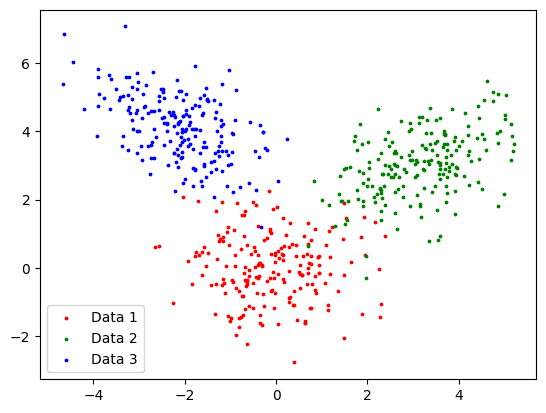

In [47]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('image1.csv', skiprows=1, delimiter=',')
data = data[:, 1:]
plt.scatter(data[:200,0],data[:200, 1], color='r', label='Data 1', s = 3)
plt.scatter(data[200:400, 0],data[200:400, 1], color='g', label='Data 2', s = 3)
plt.scatter(data[400:, 0], data[400:, 1], color='b', label='Data 3', s = 3)
plt.legend()
plt.show()

## Initialization ##

In [48]:
from scipy.stats import multivariate_normal             #requirements


n = 3                                                   #number of categories
colors = ['r', 'g', 'b']
#Initialize model values

mu = data[np.random.randint(0, data.shape[0], n), :]    #Matrix of means
sigma = np.tile(np.cov(data.T), (n,1,1))                #Matrix of covariances
pi = np.repeat(1/n, n, axis = 0)                        #Probability matrix of categories


## E-step Function ##

$$\hat{q_{n}}^{(i)} =  \frac{\pi_{i}\mathcal{N}(y_i; \mu_k,\,\Sigma_k)}{\sum_{k}^{} \pi_{k}\mathcal{N}(y_i; \mu_k,\,\Sigma_k)}$$


In [49]:
def E_step(data, mu, sigma, pi):
    Q = np.asarray([pi[i] * multivariate_normal.pdf(data, mu[i,:], sigma[i,:,:]) for i in range(n)]).T
    Q = Q / np.reshape(np.sum(Q, axis=1),(len(data), 1))
    return Q


## M-step Function

In [50]:
def M_step(data, sigma, Q):
    mu =  np.matrix([np.average(data, weights=Q[:,i], axis=0) for i in range(n)])
    for i in range(n):
        sigma[i, :, :] = (data - mu[i,:]).T @ np.multiply((data - mu[i,:]), np.tile(Q[:,i], (2,1)).T)
        sigma[i, :, :] = sigma[i, :, :] / np.sum(Q[:,i])
    pi = np.mean(Q, axis=0)
    return mu, sigma, pi

In [51]:
def plot_M(mu, sigma, data, n, colors):
    range = np.vstack((np.min(data, axis=0), np.max(data, axis=0)))
    x1 = np.linspace(range[0,0],range[1,0],200)  
    x2 = np.linspace(range[0,1],range[1,1],200)
    X, Y = np.meshgrid(x1,x2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
    plt.scatter(data[:,0], data[:,1], s = 3) 
    for i in range(n):
        Z = multivariate_normal(mu[i,:], sigma[i,:,:])
        plt.contour(X, Y, Z[i].pdf(pos), colors=colors[i] ,alpha = 0.5) 
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.grid()                                                                         # displaying gridlines
    plt.show()

def plot_E(data, Q, n, colors):
    Z = np.argmax(Q, axis=1)
    plt.scatter(data[:,0], data[:,1],color = np.choose(Z,colors), s = 3)
    plt.legend()
    plt.show()

In [52]:

Q = E_step(data, mu, sigma, pi)

new, figma, phi = M_step(data, sigma, Q)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


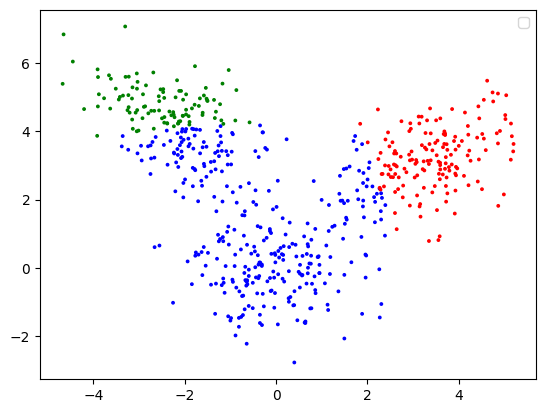

In [53]:
plot_E(data, Q, n, colors)


In [54]:
plot_M(mu, sigma, data, n, colors)

[4.90046336 4.011492  ] [[1.62850331 0.80333121]
 [0.80333121 1.51208653]]


TypeError: 'numpy.ndarray' object is not callable